In [1]:
import math
import matplotlib.pyplot as plt

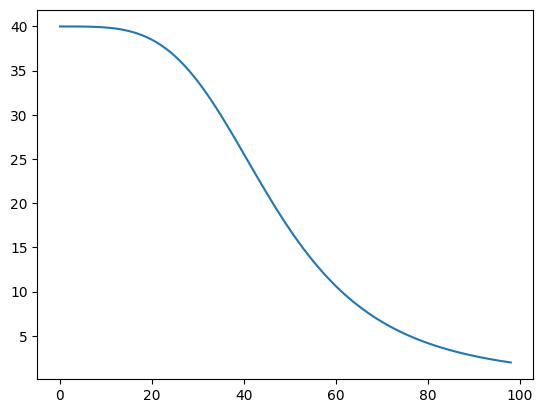

In [2]:
x = 1 / 40
max_generations = 100
values = []
for i in range(1, max_generations):
    values.append(1 /( x + ((i * 1/max_generations) ** 4) * 0.5))
plt.plot([x for x in values])

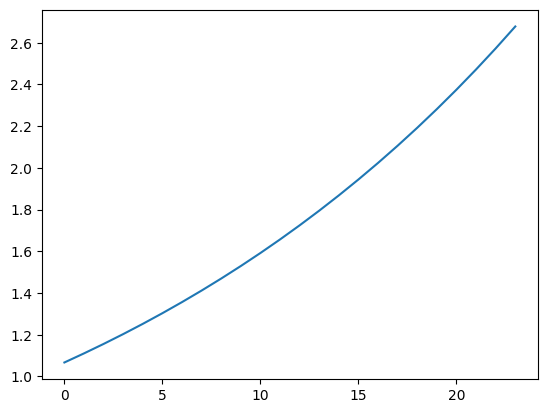

In [3]:
x = 1 / 40
max_generations = 25
values = []
for i in range(1, max_generations):
    values.append(math.exp(x + i * 1/max_generations))
plt.plot([x for x in values])

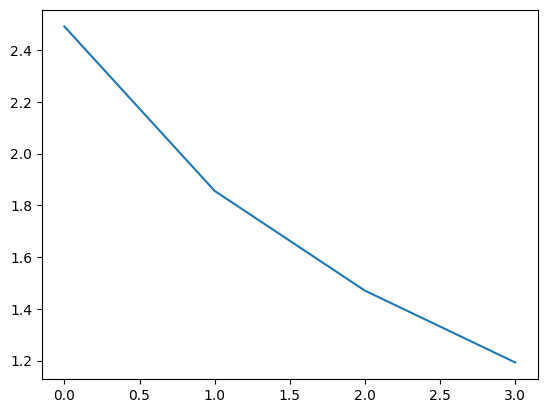

In [4]:
x = 1 / 40
max_generations = 5
values = []
for i in range(1, max_generations):
    values.append(1 - math.log(x + i * 1/max_generations))
plt.plot([x for x in values])



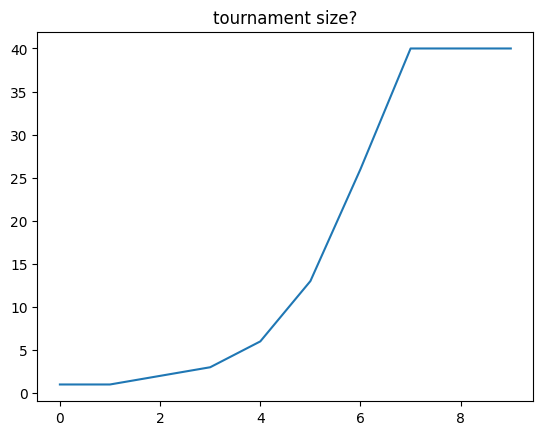

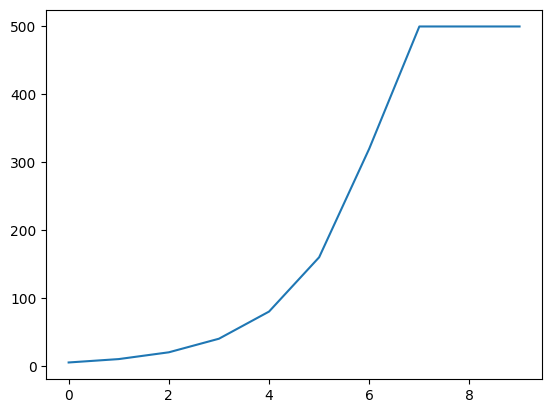

In [5]:
restarts = 10
max_generations = 5
values = []
ud = 0.4
pop_size = 5
start_size = 5
pop_sizes = []
for i in range(0, restarts):
    values.append(max(1, int((ud * 0.2 * pop_size) + 0.5)))
    pop_sizes.append(pop_size)
    pop_size = min(pop_size * 2, 500)
plt.plot([x for x in values])
plt.title('tournament size?')
plt.show()
plt.plot([s for s in pop_sizes])

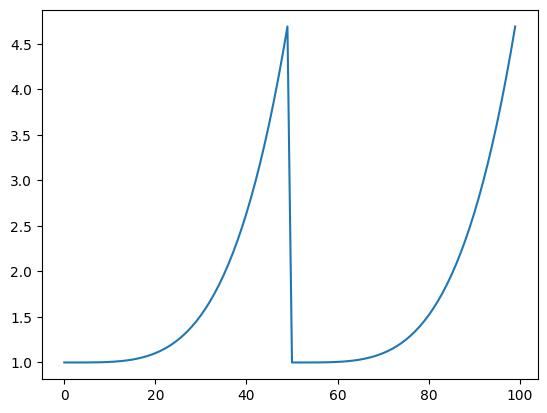

[0.0229, 0.0093, 0.0089, 0.0075, 0.0085, 0.0092, 0.009, 0.0085, 0.0062, 0.0089, 0.0084, 0.0079, 0.0088, 0.0071, 0.0076, 0.0088, 0.0089, 0.0079, 0.0073, 0.0081, 0.0095, 0.0108, 0.01, 0.0105, 0.0102, 0.0081, 0.0093, 0.0321, 0.0101, 0.0123, 0.0139, 0.0147, 0.0149, 0.015, 0.0147, 0.0147, 0.0146, 0.018, 0.0207, 0.0564, 0.0236, 0.0225, 0.0248, 0.0258, 0.0307, 0.0299, 0.0356, 0.0366, 0.0363, 0.0399, 0.007, 0.0088, 0.0082, 0.0077, 0.0077, 0.0067, 0.0079, 0.0089, 0.0097, 0.0087, 0.0076, 0.0093, 0.0238, 0.0074, 0.0078, 0.024, 0.0075, 0.0099, 0.0089, 0.0093, 0.0092, 0.0103, 0.0108, 0.0103, 0.0117, 0.0102, 0.0308, 0.0293, 0.0119, 0.0117, 0.09, 0.016, 0.0144, 0.014, 0.0151, 0.0171, 0.0163, 0.0162, 0.0204, 0.0202, 0.0239, 0.0224, 0.0227, 0.0268, 0.0297, 0.032, 0.0348, 0.0883, 0.037, 0.0406]


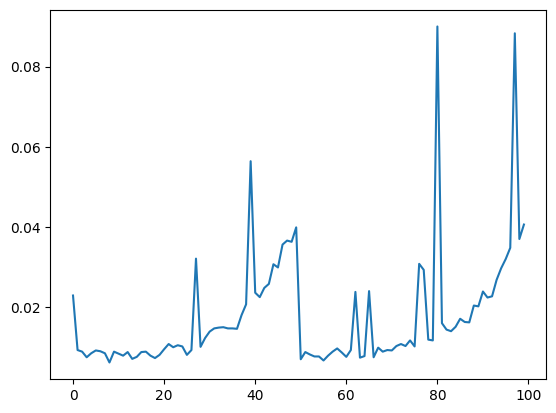

In [11]:
import random
# choose the average amount of values to mutate per individual
min_p = 1
max_p = 5
#p = 0.01
n_genes = 100
avg_start = 1
p_start = avg_start / n_genes
values = []
time_to_reset = 50
base_p = []
p_vectors = []

shares = [1] * n_genes
for i in range(10):
    shares[random.randint(0, len(shares))] += 1

m = sum([math.exp(x) for x in shares])
for i in range(100):
    p = avg_start + (((i %time_to_reset ) * (1 / time_to_reset)) ** 4) * (max_p-min_p) 
    values.append(p) #p_start + (((i %time_to_reset ) * (1 / time_to_reset)) ** 4)
    p_vector = [0] * n_genes
    for j in range(n_genes):
        p_vector[i] = p * (math.exp(shares[i]) / m)#p * math.exp(shares[i]) / sum(shares)#shares[i] * (p / (sum(shares))) # NOTE: not average mutation amount * n_genes but occurences + n_genes -> shares
    p_vectors.append(p_vector)

plt.plot(values)
plt.show()
averages = []
n_repeats = 10000
counts = []
for i in range(len(p_vectors)):
    count_run = 0
    for _ in range(n_repeats):
        for j in range(n_genes):
            if random.random() < p_vectors[i][j]:#values[i] / n_genes:
                count_run += 1
    averages.append(count_run/n_repeats)


print(averages)
plt.plot(averages)